# Mom's Step Count Analysis

## 1. Introduction

My mom is a senior citizen and I wanted to use her step count data to understand her daily activity patterns, not just observe them. 

So I combined her Fitbit step count data with Sydney weather data from the Australian Government Bureau of Meteorology to answer these 4 questions:
- Does weather really affect her activity?
- Are her weekends less active?
- How much does temperature and humidity matter?
- Is my mom's activity declining, and what can I do about it?

My **goal** was not just to analyse numbers, but to **find actionable insights to help keep her active and well as she ages.**

## 2. About the Data

I used 2 datasets and merged them by date using google sheets:
1. Step count data tracked via my mom's Fitbit device, recorded daily from October 1, 2024 to October 31, 2025.
2. Weather data sourced from the Australian Government Bureau of Meteorology (bom.gov.au), specifically from the Sydney weather station.

I used the formula "=ARRAYFORMULA(IFERROR(VLOOKUP(A2:A, steps!A:B, 2, FALSE), ""))" to combine the 2 datasets together and saved the file as 'momsteps.csv'.

## 3. Data Exploration

Now I'll use python to look for actionable insights.

I'll import the libraries needed. **Pandas** for dataframes, **Numpy** for numerical calculations, **Seaborn** and **Matplotlib** for visualisations, and **Scipy** for statistical tests, comparisons, and associations.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy import stats 
from scipy.stats import f_oneway
from scipy.stats import spearmanr

To explore the data, I'll load the dataset, check the first 5 rows, last 5 rows, number of rows and columns, column names, data type of each column, and summary of all columns, data types, and null contents.

In [2]:
df = pd.read_csv('momsteps.csv') 
df 

,date,steps,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_gust_time,...,cloud_9am,wind_dir_9am,wind_speed_9am,pressure_9am,temp_3pm,humidity_3pm,cloud_3pm,wind_dir_3pm,wind_speed_3pm,pressure_3pm
0,2024-10-1,10165,9.3,22.8,0.0,NaN,NaN,E,33.0,16:16,...,NaN,N,7,NaN,20.5,56,NaN,E,19,NaN
1,2024-10-2,8410,15.0,19.5,3.0,NaN,NaN,ESE,37.0,14:05,...,NaN,SSW,11,NaN,18.6,59,NaN,SE,15,NaN
2,2024-10-3,8248,13.1,20.3,0.0,NaN,NaN,E,31.0,13:56,...,NaN,ENE,9,NaN,18.4,56,NaN,E,17,NaN
3,2024-10-4,14193,8.3,24.6,0.0,NaN,NaN,NE,24.0,16:58,...,NaN,W,4,NaN,23.7,48,NaN,NE,9,NaN
4,2024-10-5,12063,14.6,27.2,1.8,NaN,NaN,W,43.0,11:09,...,NaN,WNW,11,NaN,25.6,32,NaN,W,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2025-10-27,6628,14.8,26.4,0.6,NaN,NaN,S,54.0,15:16,...,NaN,WNW,13,NaN,20.4,59,NaN,SE,28,NaN
389,2025-10-28,4222,11.4,16.3,0.0,NaN,NaN,SSE,35.0,0:34,...,NaN,SSW,7,NaN,16.0,47,NaN,ESE,11,NaN
390,2025-10-29,2421,12.0,18.6,2.2,NaN,NaN,E,24.0,12:18,...,NaN,WSW,6,NaN,15.9,94,NaN,ESE,13,NaN
391,2025-10-30,4811,13.7,23.8,7.8,NaN,NaN,SE,28.0,15:00,...,NaN,WSW,7,NaN,22.6,62,NaN,ESE,17,NaN


In [3]:
df.head() 

,date,steps,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_gust_time,...,cloud_9am,wind_dir_9am,wind_speed_9am,pressure_9am,temp_3pm,humidity_3pm,cloud_3pm,wind_dir_3pm,wind_speed_3pm,pressure_3pm
0,2024-10-1,10165,9.3,22.8,0.0,NaN,NaN,E,33.0,16:16,...,NaN,N,7,NaN,20.5,56,NaN,E,19,NaN
1,2024-10-2,8410,15.0,19.5,3.0,NaN,NaN,ESE,37.0,14:05,...,NaN,SSW,11,NaN,18.6,59,NaN,SE,15,NaN
2,2024-10-3,8248,13.1,20.3,0.0,NaN,NaN,E,31.0,13:56,...,NaN,ENE,9,NaN,18.4,56,NaN,E,17,NaN
3,2024-10-4,14193,8.3,24.6,0.0,NaN,NaN,NE,24.0,16:58,...,NaN,W,4,NaN,23.7,48,NaN,NE,9,NaN
4,2024-10-5,12063,14.6,27.2,1.8,NaN,NaN,W,43.0,11:09,...,NaN,WNW,11,NaN,25.6,32,NaN,W,13,NaN


In [4]:
df.tail()

,date,steps,min_temp,max_temp,rainfall,evaporation,sunshine,wind_gust_dir,wind_gust_speed,wind_gust_time,...,cloud_9am,wind_dir_9am,wind_speed_9am,pressure_9am,temp_3pm,humidity_3pm,cloud_3pm,wind_dir_3pm,wind_speed_3pm,pressure_3pm
388,2025-10-27,6628,14.8,26.4,0.6,NaN,NaN,S,54.0,15:16,...,NaN,WNW,13,NaN,20.4,59,NaN,SE,28,NaN
389,2025-10-28,4222,11.4,16.3,0.0,NaN,NaN,SSE,35.0,0:34,...,NaN,SSW,7,NaN,16.0,47,NaN,ESE,11,NaN
390,2025-10-29,2421,12.0,18.6,2.2,NaN,NaN,E,24.0,12:18,...,NaN,WSW,6,NaN,15.9,94,NaN,ESE,13,NaN
391,2025-10-30,4811,13.7,23.8,7.8,NaN,NaN,SE,28.0,15:00,...,NaN,WSW,7,NaN,22.6,62,NaN,ESE,17,NaN
392,2025-10-31,11563,13.9,26.2,0.2,NaN,NaN,E,33.0,13:01,...,NaN,NE,6,NaN,24.6,55,NaN,ENE,13,NaN


In [5]:
df.shape 

(393, 22)

In [6]:
df.columns

Index(['date', 'steps', 'min_temp ', 'max_temp', 'rainfall', 'evaporation',
       'sunshine ', 'wind_gust_dir', 'wind_gust_speed', 'wind_gust_time',
       'temp_9am', 'humidity_9am', 'cloud_9am', 'wind_dir_9am',
       'wind_speed_9am', 'pressure_9am', 'temp_3pm', 'humidity_3pm',
       'cloud_3pm', 'wind_dir_3pm', 'wind_speed_3pm', 'pressure_3pm'],
      dtype='object')

In [7]:
df.dtypes

date                object
steps                int64
min_temp           float64
max_temp           float64
rainfall           float64
evaporation        float64
sunshine           float64
wind_gust_dir       object
wind_gust_speed    float64
wind_gust_time      object
temp_9am           float64
humidity_9am         int64
cloud_9am          float64
wind_dir_9am        object
wind_speed_9am      object
pressure_9am       float64
temp_3pm           float64
humidity_3pm         int64
cloud_3pm          float64
wind_dir_3pm        object
wind_speed_3pm      object
pressure_3pm       float64
dtype: object

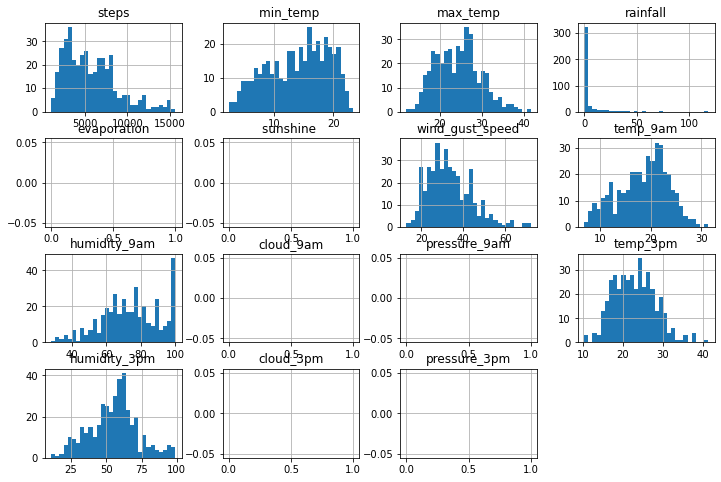

In [8]:
df.hist(figsize=(12, 8), bins=30)
plt.show()

After exploring the dataset, I found out the following:
1. **Dimension**: 393 rows and 22 columns

2. **Variable names**: 
- date: Observation date 
- steps: Daily number of steps tracked from her fitness device  
- min_temp: Minimum temperature (°C) for the day 
- max_temp: Maximum temperature (°C) for the day 
- rainfall: Rainfall amount (mm) for the day 
- evaporation: Evaporation (mm) for the day 
- sunshine: Hours of bright sunshine 
- wind_gust_dir: Direction of strongest wind gust 
- wind_gust_speed: Speed of strongest wind gust (km/h) 
- wind_gust_time: Time of strongest wind gust 
- temp_9am: Temperature (°C) at 9am 
- humidity_9am: Humidity (%) at 9am 
- cloud_9am: Cloud cover at 9am 
- wind_dir_9am: Wind direction at 9am 
- wind_speed_9am: Wind speed (km/h) at 9am 
- pressure_9am: Atmospheric pressure at 9am 
- temp_3pm: Temperature (°C) at 3pm 
- humidity_3pm: Humidity (%) at 3pm 
- cloud_3pm: Cloud cover at 3pm 
- wind_dir_3pm: Wind direction at 3pm 
- wind_speed_3pm: Wind speed (km/h) at 3pm 
- pressure_3pm: Atmospheric pressure at 3pm 
      
3. **Data Types**: float64, object, and int64
- 3.1 float64 (13) - min_temp, max_temp, rainfall, evaporation, sunshine, wind_gust_speed,     temp_9am, cloud_9am, pressure_9am, temp_3pm, cloud_3pm, humidity_3pm, pressure_3pm
- 3.2 object (6) - date, wind_gust_dir, wind_gust_time, wind_dir_9am, wind_speed_9am,    wind_dir_3pm, wind_speed_3pm
- 3.3 int64 (3) - steps, humidity_9am, humidity_3pm
 
4. **Distribution of all numeric columns before cleaning:**
- *4.1 normal/clean distributions*
    4.1.1 **steps** - right-skewed which means most days have low-moderate steps with some high days
    4.1.2 **min_temp, mac_temp, temp_9am, temp_3pm** - approximately normal and it is bell-shaped which is expected for temperatures in Sydney
    4.1.3 **humidity_9am, humidity_3pm** - relatively spread out across the range
- *4.2 problematic distributions*
    4.2.1 **rainfall** - extremely right-skewed which means most days have zero rain with rare vary heavy rain days
    4.2.2 **wind_gust_speed** - right-skewed with a long tail which means the data is not evenly spread. Most days have low to moderate wind gust speeds and a few days have very high wind gust speeds.
- *4.3 100% missing (flat or empty charts)*
    4.3.1 evaporation, sunshine, cloud_9am, pressure_9am, cloud_3pm, pressure_3pm - all show flat lines near zero because they have no data at all so I need to remove them when I clean the data.

## 4. Data Cleaning

To clean the data, I'll handle missing values, duplicates, data type conversion, and outliers.

In [9]:
#4.1 Handling missing values

df.isnull().sum() 

date                 0
steps                0
min_temp             0
max_temp             0
rainfall             3
evaporation        393
sunshine           393
wind_gust_dir        6
wind_gust_speed      6
wind_gust_time       6
temp_9am             0
humidity_9am         0
cloud_9am          393
wind_dir_9am        21
wind_speed_9am       0
pressure_9am       393
temp_3pm             0
humidity_3pm         0
cloud_3pm          393
wind_dir_3pm         5
wind_speed_3pm       0
pressure_3pm       393
dtype: int64

Variables with missing values and the number of their missing values: 
- 1. evaporation (393)
- 2. sunshine (393)
- 3. cloud_9am (393)
- 4. pressure_9am (393)
- 5. cloud_3pm (393)
- 6. pressure_3pm (393)
- 7. rainfall (3)
- 8. wind_gust_dir (6)
- 9. wind_gust_speed (6)
- 10. wind_gust_time (6)
- 11. wind_dir_9am (21)
- 12. wind_dir_3pm (5)
    
 All in all, 12 variables have missing values.

In [10]:
df = df.drop(columns=['evaporation', 'sunshine ', 'cloud_9am', 'pressure_9am', 'cloud_3pm', 'pressure_3pm'])
df 

,date,steps,min_temp,max_temp,rainfall,wind_gust_dir,wind_gust_speed,wind_gust_time,temp_9am,humidity_9am,wind_dir_9am,wind_speed_9am,temp_3pm,humidity_3pm,wind_dir_3pm,wind_speed_3pm
0,2024-10-1,10165,9.3,22.8,0.0,E,33.0,16:16,18.2,62,N,7,20.5,56,E,19
1,2024-10-2,8410,15.0,19.5,3.0,ESE,37.0,14:05,15.0,92,SSW,11,18.6,59,SE,15
2,2024-10-3,8248,13.1,20.3,0.0,E,31.0,13:56,19.2,59,ENE,9,18.4,56,E,17
3,2024-10-4,14193,8.3,24.6,0.0,NE,24.0,16:58,17.7,66,W,4,23.7,48,NE,9
4,2024-10-5,12063,14.6,27.2,1.8,W,43.0,11:09,22.5,60,WNW,11,25.6,32,W,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2025-10-27,6628,14.8,26.4,0.6,S,54.0,15:16,20.7,56,WNW,13,20.4,59,SE,28
389,2025-10-28,4222,11.4,16.3,0.0,SSE,35.0,0:34,13.7,68,SSW,7,16.0,47,ESE,11
390,2025-10-29,2421,12.0,18.6,2.2,E,24.0,12:18,13.9,97,WSW,6,15.9,94,ESE,13
391,2025-10-30,4811,13.7,23.8,7.8,SE,28.0,15:00,18.3,79,WSW,7,22.6,62,ESE,17


I dropped 6 columns with 100% missing values.

I'll check the missing values again as there are still missing values. I haven't removed the missing values of variables with less than 30 missing values.

In [11]:
df.isnull().sum() 

date                0
steps               0
min_temp            0
max_temp            0
rainfall            3
wind_gust_dir       6
wind_gust_speed     6
wind_gust_time      6
temp_9am            0
humidity_9am        0
wind_dir_9am       21
wind_speed_9am      0
temp_3pm            0
humidity_3pm        0
wind_dir_3pm        5
wind_speed_3pm      0
dtype: int64

In [12]:
df = df.dropna() 

I dropped all the null values.

In [13]:
df.isnull().sum() 

date               0
steps              0
min_temp           0
max_temp           0
rainfall           0
wind_gust_dir      0
wind_gust_speed    0
wind_gust_time     0
temp_9am           0
humidity_9am       0
wind_dir_9am       0
wind_speed_9am     0
temp_3pm           0
humidity_3pm       0
wind_dir_3pm       0
wind_speed_3pm     0
dtype: int64

Now there are no missing values.

In [14]:
#4.2 Checking for duplicates
df.duplicated().sum()

0

There are no duplicates.

In [15]:
#4.3 standardise data through datatype conversion

df.dtypes 

date                object
steps                int64
min_temp           float64
max_temp           float64
rainfall           float64
wind_gust_dir       object
wind_gust_speed    float64
wind_gust_time      object
temp_9am           float64
humidity_9am         int64
wind_dir_9am        object
wind_speed_9am      object
temp_3pm           float64
humidity_3pm         int64
wind_dir_3pm        object
wind_speed_3pm      object
dtype: object

I'll convert: 
- 1. date and wind  gust time to datetime, and 
- 2. wind_speed_9am and wind_speed_3pm to float64.

In [16]:
df['date'] = pd.to_datetime(df['date'], errors='coerce') #to datetime
df['wind_gust_time'] = pd.to_datetime(df['wind_gust_time'], errors='coerce') #to datetime
df['wind_speed_9am'] = pd.to_numeric(df['wind_speed_9am'], errors='coerce') #to float64
df['wind_speed_3pm'] = pd.to_numeric(df['wind_speed_3pm'], errors='coerce') #to float64

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19820/3458096413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce') #to datetime
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19820/3458096413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wind_gust_time'] = pd.to_datetime(df['wind_gust_time'], errors='coerce') #to datetime
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_19820/3458096413.py:3: SettingWith

In [17]:
df.columns = df.columns.str.strip()

In [18]:
df.dtypes 

date               datetime64[ns]
steps                       int64
min_temp                  float64
max_temp                  float64
rainfall                  float64
wind_gust_dir              object
wind_gust_speed           float64
wind_gust_time     datetime64[ns]
temp_9am                  float64
humidity_9am                int64
wind_dir_9am               object
wind_speed_9am              int64
temp_3pm                  float64
humidity_3pm                int64
wind_dir_3pm               object
wind_speed_3pm              int64
dtype: object

Date and wind_gust_time are now datetime64[ns], and wind_speed_9am and wind_speed_3pm are now float64.

In [19]:
#4.4 handle extreme outliers for steps column only

Q1, Q3 = df['steps'].quantile([0.25, 0.75])
df[(df['steps'] < Q1 - 2.0 * (Q3 - Q1)) | (df['steps'] > Q3 + 2.0 * (Q3 - Q1))]

,date,steps,min_temp,max_temp,rainfall,wind_gust_dir,wind_gust_speed,wind_gust_time,temp_9am,humidity_9am,wind_dir_9am,wind_speed_9am,temp_3pm,humidity_3pm,wind_dir_3pm,wind_speed_3pm


No extreme values in the data that needs to be removed or adjusted.

In [20]:
#count of extreme outliers for the steps column
Q1, Q3 = df['steps'].quantile([0.25, 0.75])
len(df[(df['steps'] < Q1 - 2.0 * (Q3 - Q1)) | (df['steps'] > Q3 + 2.0 * (Q3 - Q1))])

0

No extreme outlier/s for the steps column.

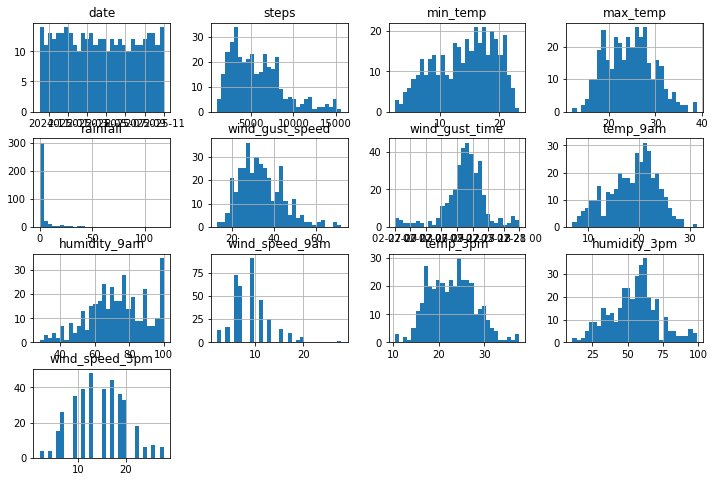

In [21]:
df.hist(figsize=(12,8), bins=30)
plt.show()

1. **definite outliers**:
- 1.1 rainfall- most extreme, distribution is extremely right-skewed
- 1.2 steps   - distribution is extremely right-skewed but less extreme compared to rainfall
- 1.3 humidity_9am - bimodal

2. **mild outliers**:
- 2.1 wind_speed_9am - right-skewed with long tails
- 2.2 wind_speed_3pm - mostly uniform but with some gaps

3. **no outliers/clean distribution**:
- 3.1 min_temp - approximately normal
- 3.2 max_temp - approximately normal
- 3.3 temp_9am - approximately normal
- 3.4 temp_3pm - approximately normal
- 3.5 humidity_3pm - Relatively uniform distribution
- 3.6 date - uniform distribution (expected for time series)


No extreme outliers. So I won't adjust anything.

<AxesSubplot:>

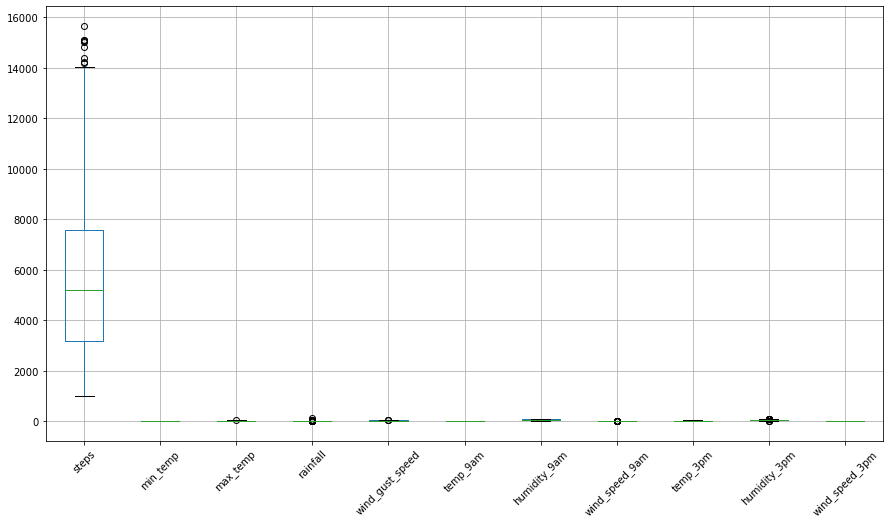

In [22]:
df.select_dtypes(include=['int64', 'float64']).boxplot(figsize=(15, 8), rot=45)

In [23]:
# 4.5 validating the results
step_data = df
step_data = df.copy()

In [24]:
# 4.5.1 check remaining missing values
step_data.isnull().sum() 

date               0
steps              0
min_temp           0
max_temp           0
rainfall           0
wind_gust_dir      0
wind_gust_speed    0
wind_gust_time     0
temp_9am           0
humidity_9am       0
wind_dir_9am       0
wind_speed_9am     0
temp_3pm           0
humidity_3pm       0
wind_dir_3pm       0
wind_speed_3pm     0
dtype: int64

There are no no remaining missing values.

In [25]:
# 4.5.2 check remaining duplicates
step_data.duplicated().sum() 

0

There are no remaining duplicates.

In [26]:
# 4.5.3 check remaining outliers 
Q1, Q3 = step_data['steps'].quantile([0.25, 0.75]) #no remaining outliers
len(step_data[(step_data['steps'] < Q1 - 2.0 * (Q3 - Q1)) | (step_data['steps'] > Q3 + 2.0 * (Q3 - Q1))])

0

There are no remaining outliers.

In [27]:
step_data.describe()

,steps,min_temp,max_temp,rainfall,wind_gust_speed,temp_9am,humidity_9am,wind_speed_9am,temp_3pm,humidity_3pm,wind_speed_3pm
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,5740.255556,14.056389,24.458611,3.292778,33.666667,18.728333,72.816667,8.872222,22.893611,54.922222,14.530556
std,3138.295871,5.066677,5.116937,10.108975,10.407304,4.813280,16.785215,3.758786,5.071976,17.046702,5.495418
min,1006.000000,2.400000,12.100000,0.000000,13.000000,6.900000,28.000000,2.000000,10.300000,11.000000,2.000000
25%,3205.250000,10.000000,20.375000,0.000000,26.000000,15.500000,62.000000,6.000000,18.800000,45.000000,11.000000
50%,5198.500000,14.700000,24.500000,0.000000,31.000000,19.450000,73.000000,9.000000,22.750000,56.000000,15.000000
75%,7582.000000,18.400000,27.725000,1.450000,41.000000,22.300000,85.250000,11.000000,26.500000,64.000000,19.000000
max,15660.000000,23.300000,38.900000,118.000000,72.000000,31.400000,100.000000,28.000000,37.700000,99.000000,28.000000


<AxesSubplot:>

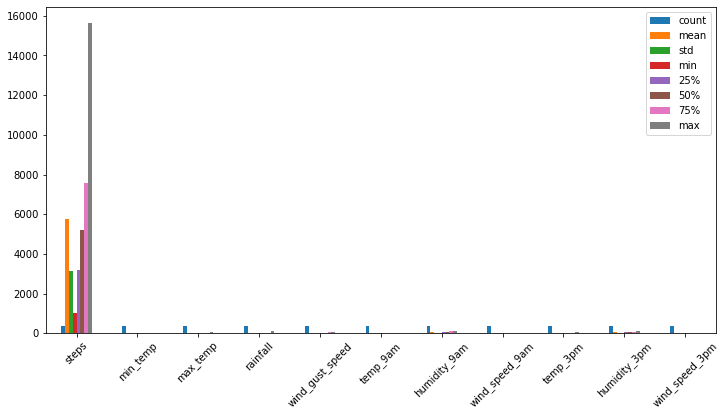

In [28]:
step_data.describe().T.plot(kind='bar', figsize=(12, 6), rot=45)

The bar chart shows:
- the steps are likely right-skewed
- rainfall likely highly right-skewed
- weather features are more normally distributed

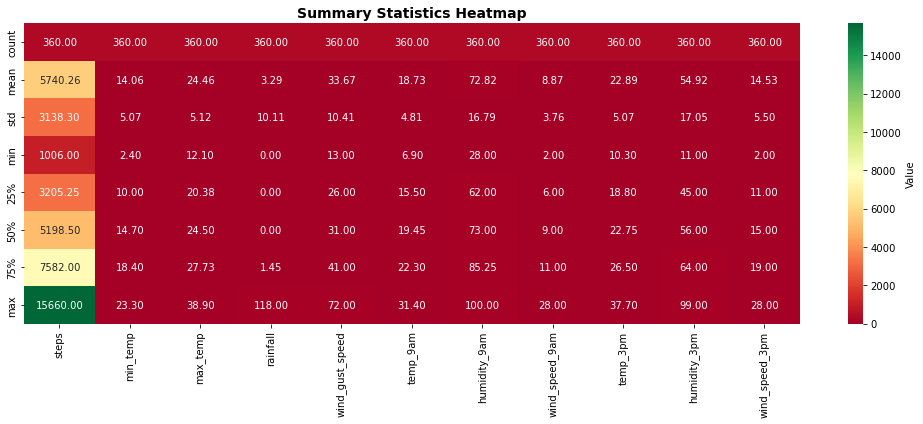

In [29]:
plt.figure(figsize=(14, 6))
sns.heatmap(step_data.describe(), annot=True, fmt='.2f', cmap='RdYlGn', cbar_kws={'label': 'Value'})
plt.title('Summary Statistics Heatmap', fontweight='bold', fontsize=14)
plt.tight_layout()

The heatmap shows the following:
- 1. total records - 360 days
- 2. no missing values as all columns show count is equal to 360
- 3. variables
    - 3.1 steps - large variability in daily steps (1,006-15,660) and right skew  due to some          days my mom walks a lot
    - 3.2 temperature (min temp and max temp) - fairly stable distribution
    - 3.3 rainfall - highly right skewed, very large outliers are present
    - 3.4 wind (wind gust speed, wind speed 9am, wind speed 3pm) - moderate variability
    - 3.5 humidity (pam humidity and 3pm humidity) - higher humidity in the morning and drops by        the afternoon, reasonably wide distribution but not that extreme
   
**Overall, the weather patterns is stable with occasional extremes and my mom's number of steps is highly fluctuating.**

In [30]:
step_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 392
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             360 non-null    datetime64[ns]
 1   steps            360 non-null    int64         
 2   min_temp         360 non-null    float64       
 3   max_temp         360 non-null    float64       
 4   rainfall         360 non-null    float64       
 5   wind_gust_dir    360 non-null    object        
 6   wind_gust_speed  360 non-null    float64       
 7   wind_gust_time   360 non-null    datetime64[ns]
 8   temp_9am         360 non-null    float64       
 9   humidity_9am     360 non-null    int64         
 10  wind_dir_9am     360 non-null    object        
 11  wind_speed_9am   360 non-null    int64         
 12  temp_3pm         360 non-null    float64       
 13  humidity_3pm     360 non-null    int64         
 14  wind_dir_3pm     360 non-null    object   

In [31]:
print(step_data.columns.tolist())

['date', 'steps', 'min_temp', 'max_temp', 'rainfall', 'wind_gust_dir', 'wind_gust_speed', 'wind_gust_time', 'temp_9am', 'humidity_9am', 'wind_dir_9am', 'wind_speed_9am', 'temp_3pm', 'humidity_3pm', 'wind_dir_3pm', 'wind_speed_3pm']


In [32]:
# 3.6 Correlation analysis
step_data.columns = step_data.columns.str.strip()
step_data[['steps', 'rainfall', 'min_temp', 'max_temp', 'wind_gust_speed', 'humidity_9am', 'humidity_3pm', 'temp_9am', 'temp_3pm', 'wind_speed_9am', 'wind_speed_3pm']].corr()['steps'].sort_values(ascending=False)

steps              1.000000
temp_9am           0.199593
wind_speed_3pm     0.192494
max_temp           0.170449
temp_3pm           0.166226
min_temp           0.096446
wind_gust_speed    0.073653
wind_speed_9am    -0.021450
rainfall          -0.102462
humidity_3pm      -0.126806
humidity_9am      -0.243130
Name: steps, dtype: float64

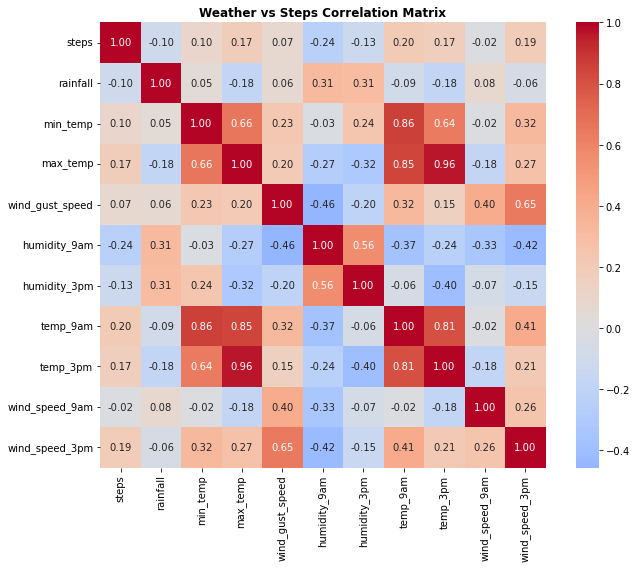

In [33]:
# correlation visualisation
plt.figure(figsize=(10, 8))
corr_matrix = step_data[['steps', 'rainfall', 'min_temp', 'max_temp', 'wind_gust_speed', 'humidity_9am', 'humidity_3pm', 'temp_9am', 'temp_3pm', 'wind_speed_9am', 'wind_speed_3pm']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Weather vs Steps Correlation Matrix', fontweight='bold')
plt.tight_layout()
plt.show()

The correlation matrix above shows that steps have weak positive relationships with wind_speed_3pm and temperature, weak negative relationships with rainfall and humidity, and overall no strong correlations with any weath variable. This means that weather has only a small influence on my mom's daily step count.

## 5. Feature Engineering

I'll add 10 new variables across 3 categories to add more meaningful information to the dataset and improve my analysis:
1. day_of_week - weekday name (Monday to Friday)
2. month - numeric month
3. season - Summer, Autumn, Winter, Spring
4. is_weekend - Saturday and Sunday
5. comfortable - 1 for comfortable weather (15 to 25 degrees celsius and no rain), 0 for not comfortable
6. temp_range - daily temperature variation
7. rain_category - no rain, light rain, and heavy rain
8. steps_7day_avg - average steps for 7 days
9. active_day - 1 is > than 5,000 steps and 0 for <= to 5,000 steps
10. week -  Week number of the year (1-52)

In [34]:
step_data['day_of_week'] = step_data['date'].dt.day_name()

In [35]:
step_data['month'] = step_data['date'].dt.month

In [36]:
step_data['season'] = step_data['date'].dt.month.map ({12:'Summer', 1:'Summer', 2:'Summer', 3:'Autumn', 4:'Autumn', 5:'Autumn', 6:'Winter', 7:'Winter', 8:'Winter', 9:'Spring', 10:'Spring', 11:'Spring'})

In [37]:
step_data['is_weekend'] = df['date'].dt.dayofweek >= 5

In [38]:
step_data['comfortable'] = (
    ((step_data['max_temp'] >= 15) & 
     (step_data['max_temp'] <= 25) & 
     (step_data['rainfall'] == 0))
).astype(int)

In [39]:
step_data['temp_range'] = step_data['max_temp'] - step_data['min_temp']

In [40]:
step_data['rain_category'] = pd.cut(
    step_data['rainfall'],
    bins=[-0.1, 0, 5, 100],
    labels=['No Rain', 'Light Rain', 'Heavy Rain']
)

In [41]:
step_data['steps_7day_avg'] = step_data['steps'].rolling(7).mean()

In [42]:
step_data['active_day'] = (step_data['steps'] > 5000).astype(int)

In [43]:
step_data['week'] = step_data['date'].dt.isocalendar().week

In [45]:
step_data

,date,steps,min_temp,max_temp,rainfall,wind_gust_dir,wind_gust_speed,wind_gust_time,temp_9am,humidity_9am,...,day_of_week,month,season,is_weekend,comfortable,temp_range,rain_category,steps_7day_avg,active_day,week
0,2024-10-01,10165,9.3,22.8,0.0,E,33.0,2026-02-27 16:16:00,18.2,62,...,Tuesday,10,Spring,False,1,13.5,No Rain,NaN,1,40
1,2024-10-02,8410,15.0,19.5,3.0,ESE,37.0,2026-02-27 14:05:00,15.0,92,...,Wednesday,10,Spring,False,0,4.5,Light Rain,NaN,1,40
2,2024-10-03,8248,13.1,20.3,0.0,E,31.0,2026-02-27 13:56:00,19.2,59,...,Thursday,10,Spring,False,1,7.2,No Rain,NaN,1,40
3,2024-10-04,14193,8.3,24.6,0.0,NE,24.0,2026-02-27 16:58:00,17.7,66,...,Friday,10,Spring,False,1,16.3,No Rain,NaN,1,40
4,2024-10-05,12063,14.6,27.2,1.8,W,43.0,2026-02-27 11:09:00,22.5,60,...,Saturday,10,Spring,True,0,12.6,Light Rain,NaN,1,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2025-10-27,6628,14.8,26.4,0.6,S,54.0,2026-02-27 15:16:00,20.7,56,...,Monday,10,Spring,False,0,11.6,Light Rain,4600.428571,1,44
389,2025-10-28,4222,11.4,16.3,0.0,SSE,35.0,2026-02-27 00:34:00,13.7,68,...,Tuesday,10,Spring,False,1,4.9,No Rain,4787.571429,0,44
390,2025-10-29,2421,12.0,18.6,2.2,E,24.0,2026-02-27 12:18:00,13.9,97,...,Wednesday,10,Spring,False,0,6.6,Light Rain,4817.857143,0,44
391,2025-10-30,4811,13.7,23.8,7.8,SE,28.0,2026-02-27 15:00:00,18.3,79,...,Thursday,10,Spring,False,0,10.1,Heavy Rain,5288.285714,0,44


In [46]:
step_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 392
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             360 non-null    datetime64[ns]
 1   steps            360 non-null    int64         
 2   min_temp         360 non-null    float64       
 3   max_temp         360 non-null    float64       
 4   rainfall         360 non-null    float64       
 5   wind_gust_dir    360 non-null    object        
 6   wind_gust_speed  360 non-null    float64       
 7   wind_gust_time   360 non-null    datetime64[ns]
 8   temp_9am         360 non-null    float64       
 9   humidity_9am     360 non-null    int64         
 10  wind_dir_9am     360 non-null    object        
 11  wind_speed_9am   360 non-null    int64         
 12  temp_3pm         360 non-null    float64       
 13  humidity_3pm     360 non-null    int64         
 14  wind_dir_3pm     360 non-null    object   

So now the final dataset to be used for my analysis have 360 rows and 26 coloumns.

## 6. Does weather affect my mom's activity?

**6.1 Humidity Analysis**

In [47]:
high_humid = step_data[step_data['humidity_9am'] > 75]['steps']
low_humid = step_data[step_data['humidity_9am'] <= 75]['steps']

t_stat, p_val = stats.ttest_ind(high_humid, low_humid)
r = step_data[['steps', 'humidity_9am']].corr().iloc[0,1]

print(f"Correlation: r={r:.3f} | High humidity: {high_humid.mean():.0f} steps | Low humidity: {low_humid.mean():.0f} steps | Diff: {abs(high_humid.mean()-low_humid.mean()):.0f} | t={t_stat:.3f}, p={p_val:.4f} {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'}")

Correlation: r=-0.243 | High humidity: 4778 steps | Low humidity: 6510 steps | Diff: 1732 | t=-5.405, p=0.0000 SIGNIFICANT


- Yes, humidity significantly affects her activity. 
- Higher morning humidity significantly reduces my mom's daily step count.
- On days with humidity above 75%, she walks fewer steps (1,732 steps), which means there is a 27% reduction.

**6.2 Seasonal Variation**

In [63]:
warm = step_data[step_data['season'].isin(['Summer', 'Spring'])]['steps']
cool = step_data[step_data['season'].isin(['Autumn', 'Winter'])]['steps']
t_stat, p_val = stats.ttest_ind(warm, cool)

print(f"Warm seasons: {warm.mean():.0f} steps | Cool seasons: {cool.mean():.0f} steps | Diff: {abs(warm.mean()-cool.mean()):.0f} | t={t_stat:.3f}, p={p_val:.4f} {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'}")
print(step_data.groupby('season')['active_day'].mean().mul(100).round(1).astype(str) + '%')

Warm seasons: 6628 steps | Cool seasons: 4630 steps | Diff: 1998 | t=6.321, p=0.0000 SIGNIFICANT
season
Autumn    41.5%
Spring    60.3%
Summer    66.7%
Winter    35.9%
Name: active_day, dtype: object


This means that my mom has more number of steps during the warmer seasons.

**6.3 Monthly Patterns**

In [49]:
groups = [step_data[step_data['month']==m]['steps'].values for m in range(1,13)]
f_stat, p_val = f_oneway(*groups)

monthly_avg = step_data.groupby('month')['steps'].mean().round(0)
print(f"ANOVA: F={f_stat:.3f}, p={p_val:.4f} {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'}")
print(f"\nPeak month: {monthly_avg.idxmax()} ({monthly_avg.max():.0f} steps)")
print(f"Lowest month: {monthly_avg.idxmin()} ({monthly_avg.min():.0f} steps)")
print(f"Difference: {((monthly_avg.max()-monthly_avg.min())/monthly_avg.min()*100):.0f}%")
print(f"\nMonthly averages:\n{monthly_avg}")

ANOVA: F=4.694, p=0.0000 SIGNIFICANT

Peak month: 11 (7429 steps)
Lowest month: 6 (4405 steps)
Difference: 69%

Monthly averages:
month
1     6285.0
2     6256.0
3     4492.0
4     4689.0
5     4673.0
6     4405.0
7     4883.0
8     4626.0
9     5218.0
10    7061.0
11    7429.0
12    7001.0
Name: steps, dtype: float64


This means that my mom walks more in November and less in June.

## 7. Are her weekends less active?

**7.1 Weekend vs Weekday**

In [50]:
weekend = step_data[step_data['is_weekend'] == True]['steps']
weekday = step_data[step_data['is_weekend'] == False]['steps']
t_stat, p_val = stats.ttest_ind(weekend, weekday)

print(f"Weekday: {weekday.mean():.0f} steps | Weekend: {weekend.mean():.0f} steps | Diff: {abs(weekday.mean()-weekend.mean()):.0f} | t={t_stat:.3f}, p={p_val:.4f} {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'}")

Weekday: 5962 steps | Weekend: 5202 steps | Diff: 759 | t=-2.096, p=0.0367 SIGNIFICANT


She walks more on weekdays (5,962 steps) than on weekends (5,202 steps). The difference of 759 steps is statistically significant, which means it is unlikely to be due to chance.

**7.2 Day of Week Patterns**

In [51]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
groups = [step_data[step_data['day_of_week']==d]['steps'].values for d in day_order]
f_stat, p_val = f_oneway(*groups)

day_avg = step_data.groupby('day_of_week')['steps'].mean().reindex(day_order).round(0)
print(f"\nANOVA: F={f_stat:.3f}, p={p_val:.4f} {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'}")
print(f"\nBest day: {day_avg.idxmax()} ({day_avg.max():.0f} steps)")
print(f"Worst day: {day_avg.idxmin()} ({day_avg.min():.0f} steps)")
print(f"\nDaily averages:\n{day_avg}")


ANOVA: F=3.564, p=0.0019 SIGNIFICANT

Best day: Monday (7318 steps)
Worst day: Saturday (4887 steps)

Daily averages:
day_of_week
Monday       7318.0
Tuesday      6062.0
Wednesday    5145.0
Thursday     5814.0
Friday       5414.0
Saturday     4887.0
Sunday       5536.0
Name: steps, dtype: float64


The ANOVA test shows that my mom's number of steps differs significantly across the days of the week (F=3.564, p=0.002). She walks the most on Monday (7,318 steps) and the least on Saturday (4,887 steps). Her activity is generally higher at the start of the week and drops toward the weekend, especially on Saturday. In summary, she is more active on weekdays, especially Monday, and less active on weekends.

## 8. How much does humidity and temperature matter?

**8.1 Correlation of all the weather variables with steps**

In [52]:
weather_vars = ['min_temp', 'max_temp', 'temp_9am', 'temp_3pm', 
                'humidity_9am', 'humidity_3pm', 'rainfall', 
                'wind_gust_speed', 'wind_speed_9am', 'wind_speed_3pm']

correlations = step_data[['steps'] + weather_vars].corr()['steps'].drop('steps').sort_values()
print("Correlation of weather variables with steps:")
print(correlations.round(3))

Correlation of weather variables with steps:
humidity_9am      -0.243
humidity_3pm      -0.127
rainfall          -0.102
wind_speed_9am    -0.021
wind_gust_speed    0.074
min_temp           0.096
temp_3pm           0.166
max_temp           0.170
wind_speed_3pm     0.192
temp_9am           0.200
Name: steps, dtype: float64


My mom's number of steps are slightly higher when the weather is warmer (positive correlation with temperatures) and slightly lower when it is more humid or rainy (negative correlation with humidity and rainfall). Wind and gusts have very little effect on her steps. So in short, she tends to walk more on days that are warm and not too humid.

**8.2 Temperature at 9am vs steps**

In [53]:
r_temp, p_temp = stats.pearsonr(step_data['temp_9am'], step_data['steps'])
print(f"\nMorning temperature (9am): r={r_temp:.3f}, p={p_temp:.4f} {'SIGNIFICANT' if p_temp < 0.05 else 'NOT SIGNIFICANT'}")


Morning temperature (9am): r=0.200, p=0.0001 SIGNIFICANT


There is a small but significant positive correlation between morning temperature and steps (r=0.200, p=0.0001). This means that when mornings are warmer, my mom tends to walk a bit more.

**8.3 Temperature range vs steps**

In [54]:
r_range, p_range = stats.pearsonr(step_data['temp_range'], step_data['steps'])
high_range = step_data[step_data['temp_range'] > step_data['temp_range'].median()]['steps']
low_range = step_data[step_data['temp_range'] <= step_data['temp_range'].median()]['steps']
t_stat, p_val = stats.ttest_ind(high_range, low_range)
print(f"Temperature range: r={r_range:.3f}, p={p_range:.4f} | High range: {high_range.mean():.0f} steps | Low range: {low_range.mean():.0f} steps | t={t_stat:.3f}, p={p_val:.4f} {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'}")

Temperature range: r=0.092, p=0.0829 | High range: 6132 steps | Low range: 5357 steps | t=2.358, p=0.0189 SIGNIFICANT


On high-range days, she walks 6,132 steps on average, compared to 5,357 on low-range days. The difference is statistically significant. This means my mom tends to walk more steps when the day starts cooler and gets warmer later, compared to days when the temperature stays about the same.

## 9. The Declining Trend

**9.1 Spearman Correlation over time**

In [55]:
step_data['day_number'] = (step_data['date'] - step_data['date'].min()).dt.days
corr, p_val = spearmanr(step_data['day_number'], step_data['steps'])
print(f"Spearman correlation: ρ={corr:.3f}, p={p_val:.4f} {'SIGNIFICANT' if p_val < 0.05 else 'NOT SIGNIFICANT'}")
print(f"Period: {step_data['date'].min().date()} to {step_data['date'].max().date()} ({step_data['day_number'].max()} days)")
print(f"Direction: {'DECLINING' if corr < 0 else 'INCREASING'}")

Spearman correlation: ρ=-0.377, p=0.0000 SIGNIFICANT
Period: 2024-10-01 to 2025-10-31 (395 days)
Direction: DECLINING


The spearman correlation shows that there is a significant negative trend over the period of October 1, 2024 to October 31, 2025. This means that over the year, my mom is gradually walking less each day. 

**9.2 Compare first vs last 3 months**

In [56]:
early = step_data[step_data['day_number'] <= 90]['steps']
late = step_data[step_data['day_number'] >= step_data['day_number'].max() - 90]['steps']
t_stat, p_val2 = stats.ttest_ind(early, late)

print(f"\nFirst 3 months average: {early.mean():.0f} steps")
print(f"Last 3 months average: {late.mean():.0f} steps")
print(f"Decline: {abs(early.mean()-late.mean()):.0f} steps ({abs((late.mean()-early.mean())/early.mean()*100):.1f}%)")
print(f"t={t_stat:.3f}, p={p_val2:.4f} {'SIGNIFICANT' if p_val2 < 0.05 else 'NOT SIGNIFICANT'}")



First 3 months average: 7997 steps
Last 3 months average: 4861 steps
Decline: 3137 steps (39.2%)
t=6.718, p=0.0000 SIGNIFICANT


In the first 3 months, she averaged 7,997 steps, while in the last 3 months, she averaged 4,861 steps. This is a decline of 3,137 steps (39.2%), which is statistically significant. Over time, her daily walking dropped a lot, almost 40% in the last 3 months compared to the first 3 months.

## 10. Visualisations and Key Insights

### 10.1 Visualisations

**10.1.1 Scatter Plot** : Does weather affect my mom's activity?

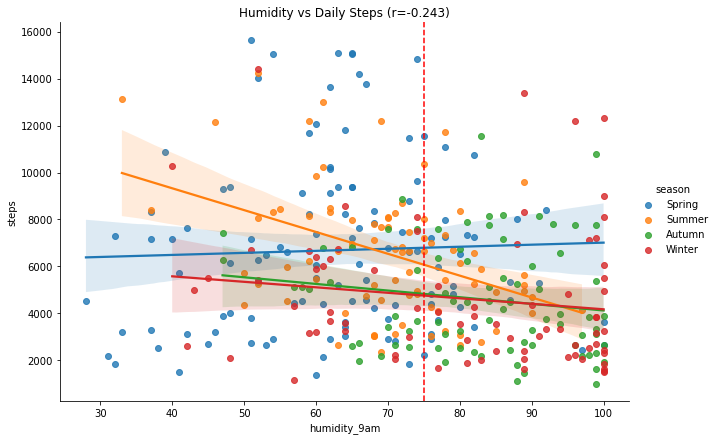

In [57]:
sns.lmplot(data=step_data, x='humidity_9am', y='steps', hue='season', height=6, aspect=1.5)
plt.axvline(75, color='red', linestyle='--'); plt.title('Humidity vs Daily Steps (r=-0.243)'); plt.show()


Yes

**10.1.2 Box Plot**: Does season matter?

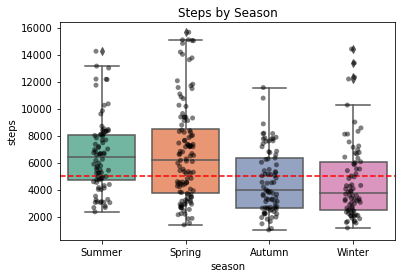

In [58]:
sns.boxplot(data=step_data, x='season', y='steps', order=['Summer','Spring','Autumn','Winter'], palette='Set2')
sns.stripplot(data=step_data, x='season', y='steps', order=['Summer','Spring','Autumn','Winter'], color='black', alpha=0.5, jitter=True)
plt.axhline(5000, color='red', linestyle='--', label='Active Day Threshold'); plt.title('Steps by Season'); plt.show()

Yes

**10.1.3 Bar Chart**: Which months are best/worst?

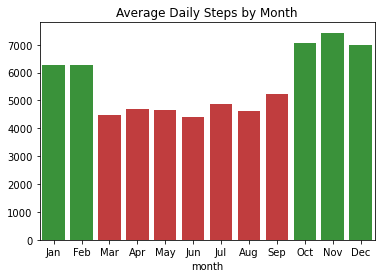

In [59]:
monthly_avg = step_data.groupby('month')['steps'].mean().round(0)
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette=['#2ca02c' if m in [10,11,12,1,2] else '#d62728' for m in monthly_avg.index]); plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']); plt.title('Average Daily Steps by Month'); plt.show()

The best month is November and the worst month is June.

**10.1.4 Line Chart**: Are weekends less active?

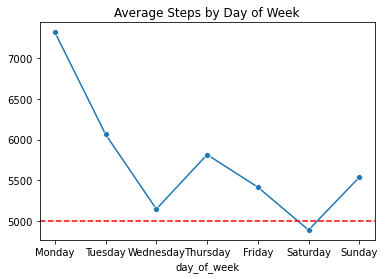

In [60]:
sns.lineplot(x=step_data.groupby('day_of_week')['steps'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).index, 
             y=step_data.groupby('day_of_week')['steps'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).values, marker='o'); plt.axhline(5000, color='red', linestyle='--'); plt.title('Average Steps by Day of Week'); plt.show()

Yes, weekends are less active.

**10.1.5 Heatmap**: How much does humidity/temperature matter?

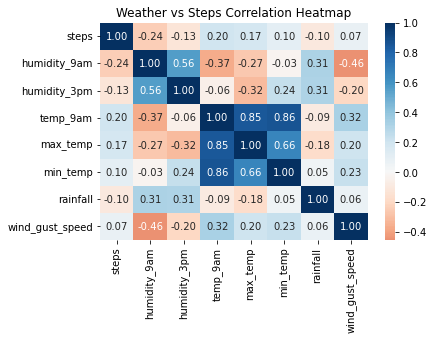

In [61]:
weather_vars = ['steps','humidity_9am','humidity_3pm','temp_9am','max_temp','min_temp','rainfall','wind_gust_speed']
sns.heatmap(step_data[weather_vars].corr(), annot=True, fmt=".2f", cmap="RdBu", center=0)
plt.title('Weather vs Steps Correlation Heatmap'); plt.show()

My mom walks more on warm and dry days, and a bit less when it's humid or rainy.

**10.1.6 Trend Line**: Is my mom's step count declining?

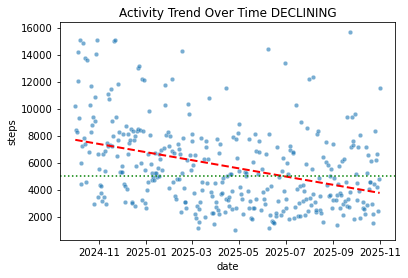

In [62]:
z = np.polyfit(step_data['day_number'], step_data['steps'], 1); p = np.poly1d(z)
sns.scatterplot(x=step_data['date'], y=step_data['steps'], s=20, alpha=0.6)
plt.plot(step_data['date'], p(step_data['day_number']), 'r--', linewidth=2)
plt.axhline(5000, color='green', linestyle=':'); plt.title('Activity Trend Over Time DECLINING'); plt.show()

Yes, my mom's step count is declining.

### 10.2 Summary of Findings

**Answers to the questions I stated earlier:**
1. **Does weather really affect her activity?**
- Yes. She is more active during warmer months compared to colder seasons.

2. **Are her weekends less active?**
- Yes. She doesn't walk much in the weekends, especially during Saturdays.

3. **How much does temperature and humidity matter?**
- Temperature has a small positive effect on her activity. Warmer mornings is equal to more steps. 
- High humidity or rainy days reduce her steps noticeably.

4. **Is my mom's activity declining, and what can I do about it?**
- Yes, her step count is declining. Over the year, her daily steps have dropped from around 8,000 in the first few months to about 4,800 in the last few months, showing a clear downward trend.
- I have prepared an action plan for her in the **Key Insights** section.

### 10.3 Key Insights

By cleaning, analysing, and visualising the 393 rows of my mom's step count data and Sydney's climate data, here is my action plan for my Mom:

1. **FIX THE WEEKEND GAP**
- Weekends average 760 fewer steps than weekdays (Weekdays = 5,962 steps, Weekends = 5,202 steps, difference 759 steps which is significant)
- ***Plan***: Saturday morning walks or weekend activities that naturally involve more movement

2. **PREPARE FOR WINTER**
- Monthly averages showed June = 4,405 steps (lowest) and November = 7,429 steps (highest), significant ANOVA.
- ***Plan***: Line up indoor alternatives before winter hits like shopping centres, home walking, or indoor exercise videos.

3. **BEAT THE HUMIDITY**  
- On high humidity days (>75%), she takes about 27% fewer steps.
- ***Plan***: Check the weather daily and have a backup indoor plan ready when humidity climbs above 75%

4. **GO EARLY**
- Morning temperature shows positive correlation (r=0.199)
- ***Plan***: Shift walks to earlier in the day when humidity is lower and conditions are better

5. **TACKLE THE DECLINING TREND which is URGENT**
- Activity has declined significantly over 360 days (ρ=-0.377)
- First 3 months average vs last 3 months shows a clear drop
- ***Plan***: Investigate why and implement re-engagement strategies before it gets worse

## 11. Conclusion

In summary, my mom’s activity varies by season, day of the week, and weather conditions, and it is gradually declining. Implementing the suggested action plan can help maintain or increase her daily steps and overall activity levels.